In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cx_Oracle

pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

%matplotlib inline

In [16]:
df_csv = pd.read_csv('cohorte_login_compra_19.csv', encoding='utf-8'
, sep=';')

In [21]:
df_csv.head()

,MIN_FECHA,EM_ID_CLIENTE,FECHA,ID_CANAL_VENTA,COD_EMPRESA,ID_PEDIDO,IMPORTE
0,2019-03-22 00:00:00,8600749480,2019-03-22 00:00:00,44.0,8.600749e+09,10018306.0,231.0
1,2019-03-04 00:00:00,1735245842976,2019-03-04 00:00:00,101.0,1.735246e+12,10011937.0,49.0
2,2019-01-02 00:00:00,8601084260,2019-01-02 00:00:00,101.0,8.601084e+09,9993838.0,289.0
3,2019-01-25 00:00:00,1734998654826,2019-04-30 00:00:00,41.0,1.734999e+12,10030023.0,1129.0
4,2019-04-02 00:00:00,1735474410839,2019-04-05 00:00:00,101.0,1.735474e+12,10024079.0,49.0


In [42]:
df = df_csv[['MIN_FECHA','EM_ID_CLIENTE','FECHA','ID_CANAL_VENTA','IMPORTE']]
df.head()

,MIN_FECHA,EM_ID_CLIENTE,FECHA,ID_CANAL_VENTA,IMPORTE
0,2019-03-22 00:00:00,8600749480,2019-03-22 00:00:00,44.0,231.0
1,2019-03-04 00:00:00,1735245842976,2019-03-04 00:00:00,101.0,49.0
2,2019-01-02 00:00:00,8601084260,2019-01-02 00:00:00,101.0,289.0
3,2019-01-25 00:00:00,1734998654826,2019-04-30 00:00:00,41.0,1129.0
4,2019-04-02 00:00:00,1735474410839,2019-04-05 00:00:00,101.0,49.0


In [43]:
df['IMPORTE_R'] = df['IMPORTE'].fillna(0)

/anaconda3/envs/basic_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
df['COMPRA'] = df['IMPORTE_R'].apply(lambda x: 'False' if x == 0 else 'True')

In [60]:
df_compra = df[df['COMPRA'] == 'True']

In [61]:
df_compra.head()

,MIN_FECHA,EM_ID_CLIENTE,FECHA,ID_CANAL_VENTA,IMPORTE,IMPORTE_R,COMPRA,CohortGroup,OrderPeriod
0,2019-03-22 00:00:00,8600749480,2019-03-22 00:00:00,44.0,231.0,231.0,True,2019-03-22,2019-03-22
1,2019-03-04 00:00:00,1735245842976,2019-03-04 00:00:00,101.0,49.0,49.0,True,2019-03-04,2019-03-04
2,2019-01-02 00:00:00,8601084260,2019-01-02 00:00:00,101.0,289.0,289.0,True,2019-01-02,2019-01-02
3,2019-01-25 00:00:00,1734998654826,2019-04-30 00:00:00,41.0,1129.0,1129.0,True,2019-01-25,2019-04-30
4,2019-04-02 00:00:00,1735474410839,2019-04-05 00:00:00,101.0,49.0,49.0,True,2019-04-02,2019-04-05


In [57]:
df['CohortGroup'] = pd.to_datetime(df['MIN_FECHA'])

In [58]:
df['OrderPeriod'] = pd.to_datetime(df['FECHA'])

In [63]:
df.head()

,MIN_FECHA,EM_ID_CLIENTE,FECHA,ID_CANAL_VENTA,IMPORTE,IMPORTE_R,COMPRA,CohortGroup,OrderPeriod
0,2019-03-22 00:00:00,8600749480,2019-03-22 00:00:00,44.0,231.0,231.0,True,2019-03-22,2019-03-22
1,2019-03-04 00:00:00,1735245842976,2019-03-04 00:00:00,101.0,49.0,49.0,True,2019-03-04,2019-03-04
2,2019-01-02 00:00:00,8601084260,2019-01-02 00:00:00,101.0,289.0,289.0,True,2019-01-02,2019-01-02
3,2019-01-25 00:00:00,1734998654826,2019-04-30 00:00:00,41.0,1129.0,1129.0,True,2019-01-25,2019-04-30
4,2019-04-02 00:00:00,1735474410839,2019-04-05 00:00:00,101.0,49.0,49.0,True,2019-04-02,2019-04-05


In [64]:
df_compra.head()

,MIN_FECHA,EM_ID_CLIENTE,FECHA,ID_CANAL_VENTA,IMPORTE,IMPORTE_R,COMPRA,CohortGroup,OrderPeriod
0,2019-03-22 00:00:00,8600749480,2019-03-22 00:00:00,44.0,231.0,231.0,True,2019-03-22,2019-03-22
1,2019-03-04 00:00:00,1735245842976,2019-03-04 00:00:00,101.0,49.0,49.0,True,2019-03-04,2019-03-04
2,2019-01-02 00:00:00,8601084260,2019-01-02 00:00:00,101.0,289.0,289.0,True,2019-01-02,2019-01-02
3,2019-01-25 00:00:00,1734998654826,2019-04-30 00:00:00,41.0,1129.0,1129.0,True,2019-01-25,2019-04-30
4,2019-04-02 00:00:00,1735474410839,2019-04-05 00:00:00,101.0,49.0,49.0,True,2019-04-02,2019-04-05


In [75]:
df_compra['CohortPeriod'] = (df_compra['OrderPeriod'] - df_compra['CohortGroup']).dt.days

/anaconda3/envs/basic_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
df_compra

,MIN_FECHA,EM_ID_CLIENTE,FECHA,ID_CANAL_VENTA,IMPORTE,IMPORTE_R,COMPRA,CohortGroup,OrderPeriod,CohortPeriod
0,2019-03-22 00:00:00,8600749480,2019-03-22 00:00:00,44.0,231.0,231.0,True,2019-03-22,2019-03-22,0
1,2019-03-04 00:00:00,1735245842976,2019-03-04 00:00:00,101.0,49.0,49.0,True,2019-03-04,2019-03-04,0
2,2019-01-02 00:00:00,8601084260,2019-01-02 00:00:00,101.0,289.0,289.0,True,2019-01-02,2019-01-02,0
3,2019-01-25 00:00:00,1734998654826,2019-04-30 00:00:00,41.0,1129.0,1129.0,True,2019-01-25,2019-04-30,95
4,2019-04-02 00:00:00,1735474410839,2019-04-05 00:00:00,101.0,49.0,49.0,True,2019-04-02,2019-04-05,3
5,2019-03-18 00:00:00,1730991623248,2019-03-18 00:00:00,101.0,40.0,40.0,True,2019-03-18,2019-03-18,0
6,2019-03-20 00:00:00,8600719418,2019-03-20 00:00:00,101.0,49.0,49.0,True,2019-03-20,2019-03-20,0
7,2019-04-27 00:00:00,1735474415660,2019-04-27 00:00:00,44.0,69.0,69.0,True,2019-04-27,2019-04-27,0
9,2019-03-25 00:00:00,1735408944040,2019-03-25 00:00:00,101.0,49.0,49.0,True,2019-03-25,2019-03-25,0
10,2019-02-26 00:00:00,1735204248870,2019-02-26 00:00:00,101.0,49.0,49.0,True,2019-02-26,2019-02-26,0


In [91]:
df_compra = df_compra[df_compra['CohortPeriod'] >= 0]

In [108]:
df_compra = df_compra[df_compra['CohortPeriod'] < 15]

In [109]:
df_compra

,MIN_FECHA,EM_ID_CLIENTE,FECHA,ID_CANAL_VENTA,IMPORTE,IMPORTE_R,COMPRA,CohortGroup,OrderPeriod,CohortPeriod
0,2019-03-22 00:00:00,8600749480,2019-03-22 00:00:00,44.0,231.0,231.0,True,2019-03-22,2019-03-22,0
1,2019-03-04 00:00:00,1735245842976,2019-03-04 00:00:00,101.0,49.0,49.0,True,2019-03-04,2019-03-04,0
2,2019-01-02 00:00:00,8601084260,2019-01-02 00:00:00,101.0,289.0,289.0,True,2019-01-02,2019-01-02,0
4,2019-04-02 00:00:00,1735474410839,2019-04-05 00:00:00,101.0,49.0,49.0,True,2019-04-02,2019-04-05,3
5,2019-03-18 00:00:00,1730991623248,2019-03-18 00:00:00,101.0,40.0,40.0,True,2019-03-18,2019-03-18,0
6,2019-03-20 00:00:00,8600719418,2019-03-20 00:00:00,101.0,49.0,49.0,True,2019-03-20,2019-03-20,0
7,2019-04-27 00:00:00,1735474415660,2019-04-27 00:00:00,44.0,69.0,69.0,True,2019-04-27,2019-04-27,0
9,2019-03-25 00:00:00,1735408944040,2019-03-25 00:00:00,101.0,49.0,49.0,True,2019-03-25,2019-03-25,0
10,2019-02-26 00:00:00,1735204248870,2019-02-26 00:00:00,101.0,49.0,49.0,True,2019-02-26,2019-02-26,0
11,2019-04-01 00:00:00,8600907874,2019-04-01 00:00:00,44.0,231.0,231.0,True,2019-04-01,2019-04-01,0


In [110]:
grouped = df_compra.groupby(['CohortGroup', 'CohortPeriod'])

# count the unique users, orders, and total revenue per Group + Period
cohorts = grouped.agg({'EM_ID_CLIENTE': pd.Series.nunique,
                       #'PRODUCT': pd.Series.count,
                       'IMPORTE': np.sum})

# make the column names more meaningful
cohorts.rename(columns={'EM_ID_CLIENTE': 'TotalUsers'
                        #,'PRODUCT': 'TotalOrders'
                       }, inplace=True)
cohorts.head()

TotalUsers  IMPORTE
CohortGroup CohortPeriod                     
2019-01-01  0                      4    256.0
            1                      1    289.0
            7                      1     79.0
            14                     1     49.0
2019-01-02  0                     65   8645.0

In [111]:
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).sum()
cohort_group_size.head()

CohortGroup
2019-01-01      7
2019-01-02    109
2019-01-03    113
2019-01-04     73
2019-01-05     17
Name: TotalUsers, dtype: int64

In [112]:
cohorts['TotalUsers'].unstack(0).head()

CohortGroup,2019-01-01 00:00:00,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-05 00:00:00,2019-01-06 00:00:00,2019-01-07 00:00:00,2019-01-08 00:00:00,2019-01-09 00:00:00,2019-01-10 00:00:00,2019-01-11 00:00:00,2019-01-12 00:00:00,2019-01-13 00:00:00,2019-01-14 00:00:00,2019-01-15 00:00:00,2019-01-16 00:00:00,2019-01-17 00:00:00,2019-01-18 00:00:00,2019-01-19 00:00:00,2019-01-20 00:00:00,2019-01-21 00:00:00,2019-01-22 00:00:00,2019-01-23 00:00:00,2019-01-24 00:00:00,2019-01-25 00:00:00,...,2019-04-06 00:00:00,2019-04-07 00:00:00,2019-04-08 00:00:00,2019-04-09 00:00:00,2019-04-10 00:00:00,2019-04-11 00:00:00,2019-04-12 00:00:00,2019-04-13 00:00:00,2019-04-14 00:00:00,2019-04-15 00:00:00,2019-04-16 00:00:00,2019-04-17 00:00:00,2019-04-18 00:00:00,2019-04-19 00:00:00,2019-04-20 00:00:00,2019-04-21 00:00:00,2019-04-22 00:00:00,2019-04-23 00:00:00,2019-04-24 00:00:00,2019-04-25 00:00:00,2019-04-26 00:00:00,2019-04-27 00:00:00,2019-04-28 00:00:00,2019-04-29 00:00:00,2019-04-30 00:00:00
CohortPeriod,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4.0,65.0,78.0,53.0,4.0,6.0,61.0,89.0,92.0,84.0,51.0,9.0,8.0,99.0,103.0,96.0,79.0,69.0,10.0,7.0,91.0,89.0,95.0,92.0,49.0,...,13.0,6.0,123.0,87.0,95.0,88.0,65.0,7.0,8.0,87.0,76.0,69.0,24.0,6.0,2.0,5.0,50.0,80.0,101.0,87.0,50.0,10.0,8.0,89.0,80.0
1,1.0,21.0,10.0,3.0,1.0,NaN,16.0,17.0,15.0,16.0,1.0,1.0,2.0,18.0,21.0,15.0,12.0,NaN,3.0,4.0,27.0,16.0,20.0,17.0,NaN,...,NaN,3.0,28.0,25.0,20.0,13.0,2.0,2.0,2.0,13.0,9.0,4.0,NaN,1.0,NaN,1.0,13.0,21.0,19.0,16.0,NaN,1.0,2.0,14.0,1.0
2,NaN,12.0,1.0,1.0,5.0,NaN,9.0,10.0,9.0,NaN,1.0,NaN,NaN,14.0,6.0,9.0,NaN,NaN,3.0,1.0,9.0,10.0,4.0,NaN,NaN,...,2.0,1.0,7.0,2.0,7.0,1.0,NaN,1.0,2.0,7.0,3.0,NaN,NaN,NaN,NaN,3.0,6.0,9.0,8.0,1.0,1.0,5.0,1.0,1.0,10.0
3,NaN,NaN,NaN,8.0,1.0,NaN,4.0,7.0,NaN,1.0,8.0,NaN,1.0,3.0,4.0,NaN,NaN,11.0,1.0,NaN,4.0,6.0,NaN,1.0,11.0,...,1.0,NaN,7.0,4.0,NaN,2.0,12.0,NaN,2.0,1.0,NaN,NaN,NaN,1.0,3.0,3.0,1.0,2.0,NaN,NaN,11.0,1.0,1.0,6.0,6.0
4,NaN,NaN,4.0,2.0,1.0,1.0,2.0,NaN,4.0,6.0,4.0,2.0,NaN,4.0,NaN,NaN,7.0,6.0,1.0,NaN,3.0,1.0,NaN,8.0,8.0,...,1.0,NaN,6.0,NaN,NaN,10.0,3.0,1.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,NaN,6.0,2.0,NaN,1.0,4.0,NaN


In [113]:
user_retention = cohorts['TotalUsers'].unstack(0)

In [114]:
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention

CohortGroup,2019-01-01 00:00:00,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-05 00:00:00,2019-01-06 00:00:00,2019-01-07 00:00:00,2019-01-08 00:00:00,2019-01-09 00:00:00,2019-01-10 00:00:00,2019-01-11 00:00:00,2019-01-12 00:00:00,2019-01-13 00:00:00,2019-01-14 00:00:00,2019-01-15 00:00:00,2019-01-16 00:00:00,2019-01-17 00:00:00,2019-01-18 00:00:00,2019-01-19 00:00:00,2019-01-20 00:00:00,2019-01-21 00:00:00,2019-01-22 00:00:00,2019-01-23 00:00:00,2019-01-24 00:00:00,2019-01-25 00:00:00,...,2019-04-06 00:00:00,2019-04-07 00:00:00,2019-04-08 00:00:00,2019-04-09 00:00:00,2019-04-10 00:00:00,2019-04-11 00:00:00,2019-04-12 00:00:00,2019-04-13 00:00:00,2019-04-14 00:00:00,2019-04-15 00:00:00,2019-04-16 00:00:00,2019-04-17 00:00:00,2019-04-18 00:00:00,2019-04-19 00:00:00,2019-04-20 00:00:00,2019-04-21 00:00:00,2019-04-22 00:00:00,2019-04-23 00:00:00,2019-04-24 00:00:00,2019-04-25 00:00:00,2019-04-26 00:00:00,2019-04-27 00:00:00,2019-04-28 00:00:00,2019-04-29 00:00:00,2019-04-30 00:00:00
CohortPeriod,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.571429,0.596330,0.690265,0.726027,0.235294,0.750,0.628866,0.635714,0.617450,0.682927,0.698630,0.529412,0.615385,0.668919,0.677632,0.690647,0.686957,0.669903,0.50,0.500000,0.659420,0.635714,0.725191,0.681481,0.644737,...,0.684211,0.6,0.687151,0.707317,0.669014,0.682171,0.738636,0.500000,0.500,0.707317,0.783505,0.784091,0.800000,0.545455,0.333333,0.416667,0.657895,0.634921,0.660131,0.713115,0.641026,0.555556,0.571429,0.700787,0.714286
1,0.142857,0.192661,0.088496,0.041096,0.058824,NaN,0.164948,0.121429,0.100671,0.130081,0.013699,0.058824,0.153846,0.121622,0.138158,0.107914,0.104348,NaN,0.15,0.285714,0.195652,0.114286,0.152672,0.125926,NaN,...,NaN,0.3,0.156425,0.203252,0.140845,0.100775,0.022727,0.142857,0.125,0.105691,0.092784,0.045455,NaN,0.090909,NaN,0.083333,0.171053,0.166667,0.124183,0.131148,NaN,0.055556,0.142857,0.110236,0.008929
2,NaN,0.110092,0.008850,0.013699,0.294118,NaN,0.092784,0.071429,0.060403,NaN,0.013699,NaN,NaN,0.094595,0.039474,0.064748,NaN,NaN,0.15,0.071429,0.065217,0.071429,0.030534,NaN,NaN,...,0.105263,0.1,0.039106,0.016260,0.049296,0.007752,NaN,0.071429,0.125,0.056911,0.030928,NaN,NaN,NaN,NaN,0.250000,0.078947,0.071429,0.052288,0.008197,0.012821,0.277778,0.071429,0.007874,0.089286
3,NaN,NaN,NaN,0.109589,0.058824,NaN,0.041237,0.050000,NaN,0.008130,0.109589,NaN,0.076923,0.020270,0.026316,NaN,NaN,0.106796,0.05,NaN,0.028986,0.042857,NaN,0.007407,0.144737,...,0.052632,NaN,0.039106,0.032520,NaN,0.015504,0.136364,NaN,0.125,0.008130,NaN,NaN,NaN,0.090909,0.500000,0.250000,0.013158,0.015873,NaN,NaN,0.141026,0.055556,0.071429,0.047244,0.053571
4,NaN,NaN,0.035398,0.027397,0.058824,0.125,0.020619,NaN,0.026846,0.048780,0.054795,0.117647,NaN,0.027027,NaN,NaN,0.060870,0.058252,0.05,NaN,0.021739,0.007143,NaN,0.059259,0.105263,...,0.052632,NaN,0.033520,NaN,NaN,0.077519,0.034091,0.071429,NaN,NaN,NaN,NaN,0.033333,0.181818,NaN,NaN,0.013158,NaN,NaN,0.049180,0.025641,NaN,0.071429,0.031496,NaN
5,NaN,0.064220,0.079646,NaN,0.117647,0.125,NaN,NaN,0.087248,0.048780,0.041096,0.176471,0.076923,0.006757,NaN,0.014388,0.043478,0.058252,NaN,NaN,NaN,NaN,0.022901,0.037037,0.039474,...,NaN,NaN,NaN,NaN,0.063380,0.007752,0.034091,0.142857,NaN,NaN,NaN,0.056818,0.133333,NaN,NaN,NaN,NaN,NaN,0.045752,0.024590,NaN,0.055556,NaN,NaN,0.008929
6,NaN,0.009174,0.026549,0.027397,NaN,NaN,NaN,0.064286,0.026846,0.024390,0.013699,0.058824,NaN,0.006757,0.019737,0.057554,0.017391,0.029126,0.05,0.071429,NaN,0.021429,0.015267,0.029630,0.026316,...,0.052632,NaN,NaN,0.024390,0.014085,0.015504,NaN,NaN,NaN,NaN,0.010309,0.045455,NaN,NaN,0.166667,NaN,NaN,0.023810,0.013072,0.008197,0.025641,NaN,NaN,NaN,0.008929
7,0.142857,0.018349,0.035398,0.013699,0.058824,NaN,NaN,0.028571,0.026846,0.024390,0.027397,NaN,NaN,0.020270,0.032895,0.021583,0.008696,0.009709,NaN,NaN,0.007246,0.028571,NaN,0.022222,NaN,...,0.052632,NaN,0.027933,NaN,0.014085,0.007752,NaN,NaN,NaN,0.032520,0.020619,0.034091,0.033333,NaN,NaN,NaN,0.026316

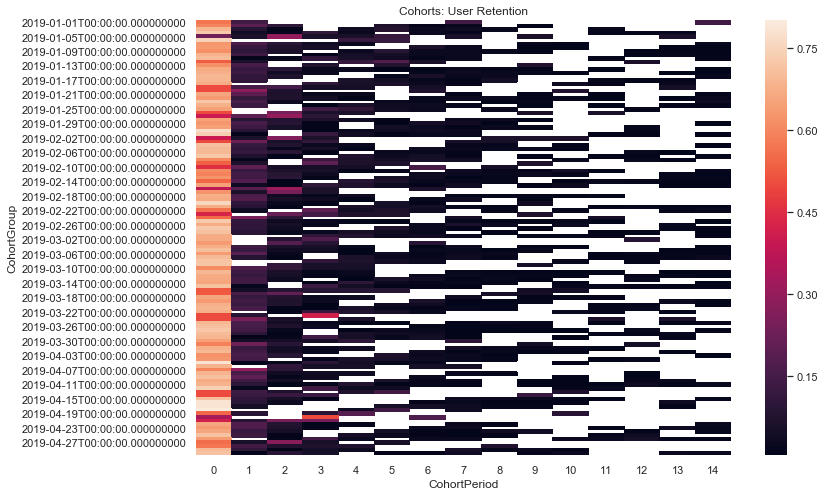

In [115]:
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=False, fmt='0.0%');